In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse

from astropy import units as u
from astropy.table import Table, join
from astropy.time import Time
import lightkurve as lk
from matplotlib.collections import LineCollection
from tqdm import tqdm_notebook

import glob, os

from astropy.table import Table
plt.rcParams['font.size'] = 20
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['savefig.dpi']= 300             #72 
# mpl.rcParams["font.family"] = "Computer Modern Roman"
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = Table.read('joined_lofar.csv',format='ascii')

In [3]:
lit, measured = data['Literature Rotation Period'],data['Rotation Period']

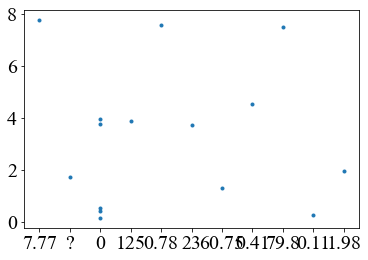

In [4]:
plt.plot(lit,measured,'.')

In [5]:
xray= np.array(data['Soft X-ray Lum (x1E28 ergs/s)'])
radio = np.array(data['LOFAR Lum (x1E14 ergs/s/Hz)'])
dradio = np.array(data['Uncert. Lofar Lum'])
flarerate = np.array(data['Flare Rate'])
names = np.array(data['Name'])

quiescent = ['GJ 625', 'GJ 450', 'GJ 1151', 'LP 169-22', 'G 240-45']
binaries = ['DG CVn', 'CR Dra', 'GJ 3861']

In [6]:
uplims = ['<' in xr for xr in xray]
xrayclean = [float((xr).strip('<')) for xr in xray]

<ipython-input-7-adc82b944ece>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  thismap.set_bad(color='k')
<ipython-input-7-adc82b944ece>:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  sc.cmap.set_under('k')


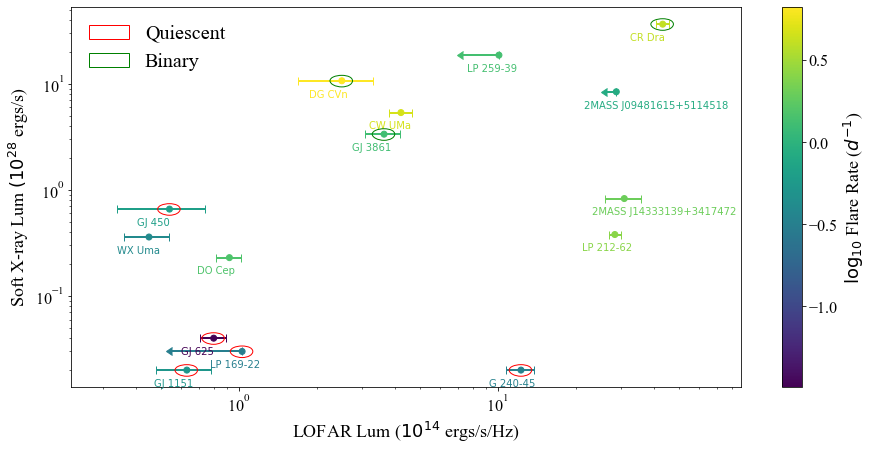

In [7]:
fig = plt.figure(figsize=(15.0,7.0))
ax = plt.gca()

this_mappable = np.log10((flarerate))
bad = ~np.isfinite(this_mappable)
this_mappable[bad] = np.nan

vmin,vmax = np.nanmin(this_mappable),np.nanmax(this_mappable)
this_mappable[bad] = -10

thismap = mpl.cm.viridis
thismap.set_bad(color='k')

sc = plt.scatter(radio,xrayclean,c=this_mappable,cmap=thismap)
sc.cmap.set_under('k')
sc.set_clim(vmin, vmax)

#create colorbar according to the scatter plot
clb = plt.colorbar(sc)
clb.set_label(r'$\log_{10}$ Flare Rate ($d^{-1}$)',fontsize=18)
clb.ax.tick_params(labelsize=16) 

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=thismap)
this_mappable[bad] = np.nan
color = np.array([(mapper.to_rgba(v)) for v in this_mappable])

for j in range(15):
    plt.errorbar(radio[j],xrayclean[j],xerr=dradio[j],xuplims=uplims[j],ls='None',c=color[j], lw=2, capsize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(radio)*0.5,np.max(radio)*2)
plt.xlabel('LOFAR Lum ($10^{14}$ ergs/s/Hz)',fontsize=18)
plt.ylabel(r'Soft X-ray Lum $(10^{28}$ ergs/s)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for j, star in enumerate(names):
    wh = np.where(names==star)[0][0]
    plt.text(radio[wh]*0.75,xrayclean[wh]*0.7,star,fontsize=10,c=color[j],fontname='DejaVu Sans')
# fig.colorbar(mpl.cm.ScalarMappable(norm=None,cmap=mpl.cm.hot(flarerate)))

for j, star in enumerate(quiescent):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    f = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='r',zorder=11,
               transform=ax.transData)
    fig.add_artist(f)

    
for j, star in enumerate(binaries):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    g = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='g',zorder=11,
               transform=ax.transData)
    fig.add_artist(g)

plt.legend([f,g],['Quiescent','Binary'],frameon=False)
plt.savefig('gudel_benz_flares.png',bbox_inches='tight')
plt.savefig('gudel_benz_flares.pdf',bbox_inches='tight')

In [8]:
gudel_m_dwarfs = Table.read('../data/m_dwarfs_gudel2002.csv',format='ascii')
gudel_k_dwarfs = Table.read('../data/k_dwarfs_gudel2002.csv',format='ascii')
gudel_fk_com = Table.read('../data/fk_com_gudel2002.csv',format='ascii')
gudel_rs_cvns = Table.read('../data/rs_cvns_gudel2002.csv',format='ascii')
gudel_by_dra = Table.read('../data/by_dra_gudel2002.csv',format='ascii')

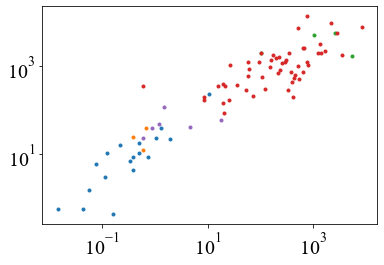

In [9]:
plt.plot(gudel_m_dwarfs['col1']/1.0e14,gudel_m_dwarfs['col2']/1.0e28,'.')
plt.plot(gudel_k_dwarfs['col1']/1.0e14,gudel_k_dwarfs['col2']/1.0e28,'.')
plt.plot(gudel_fk_com['col1']/1.0e14,gudel_fk_com['col2']/1.0e28,'.')

plt.plot(gudel_rs_cvns['col1']/1.0e14,gudel_rs_cvns['col2']/1.0e28,'.')
plt.plot(gudel_by_dra['col1']/1.0e14,gudel_by_dra['col2']/1.0e28,'.')

plt.xscale('log')
plt.yscale('log')

<ipython-input-10-c85ac1ec8c27>:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  thismap.set_bad(color='k')
<ipython-input-10-c85ac1ec8c27>:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  sc.cmap.set_under('k')


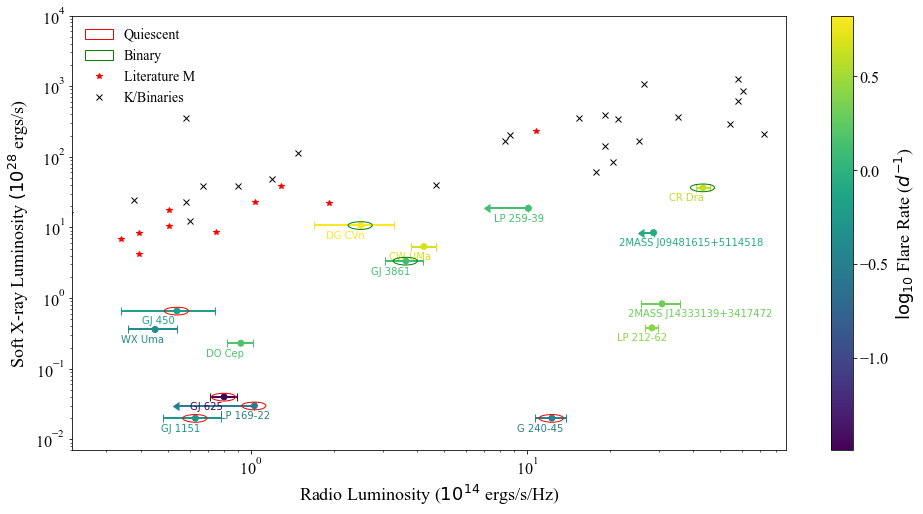

In [10]:
fig = plt.figure(figsize=(16.0,8.0))
ax = plt.gca()

this_mappable = np.log10((flarerate))
bad = ~np.isfinite(this_mappable)
this_mappable[bad] = np.nan

vmin,vmax = np.nanmin(this_mappable),np.nanmax(this_mappable)
this_mappable[bad] = -10

thismap = mpl.cm.viridis
thismap.set_bad(color='k')

sc = plt.scatter(radio,xrayclean,c=this_mappable,cmap=thismap)
sc.cmap.set_under('k')
sc.set_clim(vmin, vmax)

#create colorbar according to the scatter plot
clb = plt.colorbar(sc)
clb.set_label(r'$\log_{10}$ Flare Rate ($d^{-1}$)',fontsize=18)
clb.ax.tick_params(labelsize=16) 

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=thismap)
this_mappable[bad] = np.nan
color = np.array([(mapper.to_rgba(v)) for v in this_mappable])

for j in range(15):
    plt.errorbar(radio[j],xrayclean[j],xerr=dradio[j],xuplims=uplims[j],ls='None',c=color[j], lw=2, capsize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(radio)*0.5,np.max(radio)*2)
plt.xlabel('Radio Luminosity ($10^{14}$ ergs/s/Hz)',fontsize=18)
plt.ylabel(r'Soft X-ray Luminosity $(10^{28}$ ergs/s)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for j, star in enumerate(names):
    wh = np.where(names==star)[0][0]
    plt.text(radio[wh]*0.75,xrayclean[wh]*0.65,star,fontsize=10,c=color[j],fontname='DejaVu Sans')
# fig.colorbar(mpl.cm.ScalarMappable(norm=None,cmap=mpl.cm.hot(flarerate)))

for j, star in enumerate(quiescent):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    f = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='r',zorder=11,
               transform=ax.transData)
    fig.add_artist(f)

    
for j, star in enumerate(binaries):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    g = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='g',zorder=11,
               transform=ax.transData)
    fig.add_artist(g)


mm = plt.plot(gudel_m_dwarfs['col1']/1.0e14,gudel_m_dwarfs['col2']/1.0e28,'*r')
kk = plt.plot(gudel_k_dwarfs['col1']/1.0e14,gudel_k_dwarfs['col2']/1.0e28,'xk')
plt.plot(gudel_fk_com['col1']/1.0e14,gudel_fk_com['col2']/1.0e28,'xk')

plt.plot(gudel_rs_cvns['col1']/1.0e14,gudel_rs_cvns['col2']/1.0e28,'xk')
plt.plot(gudel_by_dra['col1']/1.0e14,gudel_by_dra['col2']/1.0e28,'xk')

# plt.legend([f,g,mm[0],kk[0]],['Quiescent','Binary','Literature M','K/Binaries'],frameon=False,loc=2)
plt.legend([f,g,mm[0],kk[0]],['Quiescent','Binary','Literature M','K/Binaries'],
           framealpha=1,edgecolor='white',loc=2,fontsize=14)

plt.ylim(0.7e-2,1e4)

plt.savefig('gudel_benz_flares_context.png',bbox_inches='tight')
plt.savefig('gudel_benz_flares_context.pdf',bbox_inches='tight')

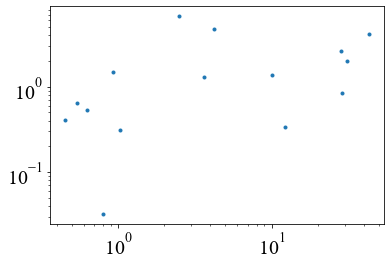

In [11]:
plt.plot(radio,flarerate,'.')
plt.xscale('log')
plt.yscale('log')

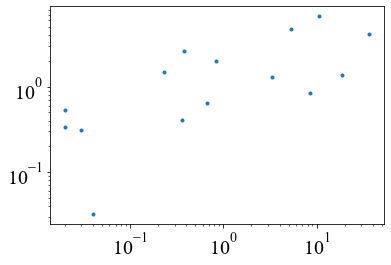

In [12]:
plt.plot(xrayclean,flarerate,'.')
plt.xscale('log')
plt.yscale('log')

In [13]:
all_lcs = []
all_preds = []
ddir = 'results/reanalysis/'
for star in quiescent:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?
    print(search)
    lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('%savg_preds_%s_%d.csv' % (ddir,star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds[0])

Doing GJ 625


<ipython-input-13-47874903aab0>:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?


SearchResult containing 11 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 16 2019      SPOC     120   207492082      0.0
  1 TESS Sector 16 2019 TESS-SPOC    1800   207492082      0.0
  2 TESS Sector 16 2019       QLP    1800   207492082      0.0
  3 TESS Sector 23 2020      SPOC     120   207492082      0.0
  4 TESS Sector 23 2020 TESS-SPOC    1800   207492082      0.0
  5 TESS Sector 23 2020       QLP    1800   207492082      0.0
  6 TESS Sector 24 2020 TESS-SPOC    1800   207492082      0.0
  7 TESS Sector 24 2020       QLP    1800   207492082      0.0
  8 TESS Sector 25 2020      SPOC     120   207492082      0.0
  9 TESS Sector 25 2020 TESS-SPOC    1800   207492082      0.0
 10 TESS Sector 25 2020       QLP    1800   207492082      0.0


<ipython-input-13-47874903aab0>:9: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-13-47874903aab0>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-13-47874903aab0>:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?


Doing GJ 450
SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 22 2020      SPOC     120   144400022      0.0
  1 TESS Sector 22 2020 TESS-SPOC    1800   144400022      0.0
  2 TESS Sector 22 2020       QLP    1800   144400022      0.0
Doing GJ 1151


<ipython-input-13-47874903aab0>:9: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-13-47874903aab0>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-13-47874903aab0>:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?


SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 22 2020      SPOC     120    11893637      0.0
  1 TESS Sector 22 2020 TESS-SPOC    1800    11893637      0.0
  2 TESS Sector 22 2020       QLP    1800    11893637      0.0


<ipython-input-13-47874903aab0>:9: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-13-47874903aab0>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-13-47874903aab0>:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?


Doing LP 169-22
SearchResult containing 6 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 21 2020      SPOC     120   148673115      0.0
  1 TESS Sector 21 2020 TESS-SPOC    1800   148673115      0.0
  2 TESS Sector 21 2020       QLP    1800   148673115      0.0
  3 TESS Sector 22 2020      SPOC     120   148673115      0.0
  4 TESS Sector 22 2020 TESS-SPOC    1800   148673115      0.0
  5 TESS Sector 22 2020       QLP    1800   148673115      0.0


<ipython-input-13-47874903aab0>:9: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-13-47874903aab0>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-13-47874903aab0>:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?


Doing G 240-45
SearchResult containing 33 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019      SPOC     120   307957392      0.0
  1 TESS Sector 14 2019 TESS-SPOC    1800   307957392      0.0
  2 TESS Sector 14 2019       QLP    1800   307957392      0.0
  3 TESS Sector 15 2019      SPOC     120   307957392      0.0
  4 TESS Sector 15 2019 TESS-SPOC    1800   307957392      0.0
  5 TESS Sector 15 2019       QLP    1800   307957392      0.0
  6 TESS Sector 16 2019      SPOC     120   307957392      0.0
  7 TESS Sector 16 2019 TESS-SPOC    1800   307957392      0.0
  8 TESS Sector 16 2019       QLP    1800   307957392      0.0
  9 TESS Sector 17 2019      SPOC     120   307957392      0.0
...            ...  ...       ...     ...         ...      ...
 23 TESS Sector 22 2020       QLP    1800   307957392      0

<ipython-input-13-47874903aab0>:9: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-13-47874903aab0>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)


<ipython-input-14-852c42eb5792>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('quiescent_stars_1_sector.png',bbox_inches='tight',rasterized=True)
<ipython-input-14-852c42eb5792>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('quiescent_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)


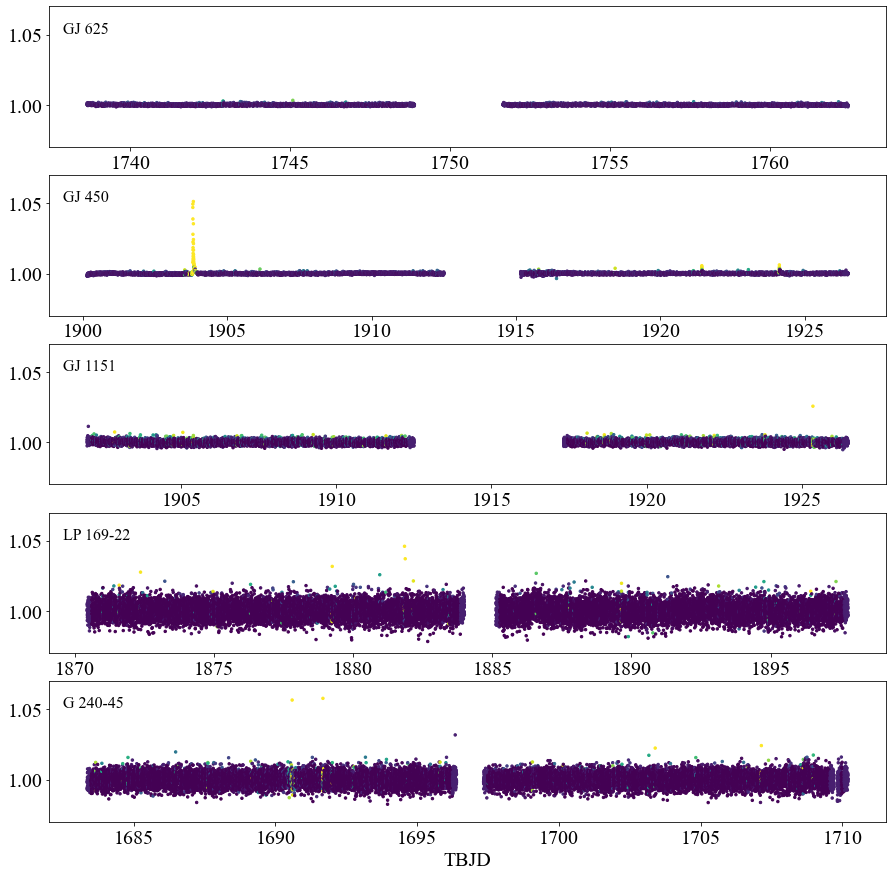

In [14]:
fig, axes = plt.subplots(5,1,figsize=(15,15))
for j, lc in enumerate(all_lcs):
#     lcc = lc.remove_nans()
    ax = axes[j]
    ax.set_rasterized(True)
    ax.scatter(lc.time.value,lc.flux,c=all_preds[j],label=quiescent[j],vmin=0, vmax=1, s=6)
    leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
    for item in leg.legendHandles:
        item.set_visible(False)
    ax.set_ylim(0.97,1.07)
    if j == 4:
        ax.set_xlabel('TBJD')
        
plt.savefig('quiescent_stars_1_sector.png',bbox_inches='tight',rasterized=True)
plt.savefig('quiescent_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)

In [16]:
all_lcs = []
all_preds = []

active = [x for x in list(data['Name']) if x not in quiescent]
# active = [x for x in active if x not in ['DO Cep']]

for star in active:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?
    print(search)
    lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('%savg_preds_%s_%d.csv' % (ddir,star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds[0])

Doing CW UMa


<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 22 2020   SPOC     120    85334035      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing LP 259-39
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 21 2020   SPOC     120   166597074      0.0
Doing WX Uma


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 21 2020   SPOC     120   252803603      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing GJ 3861
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 15 2019   SPOC     120   298164374      0.0
  1 TESS Sector 16 2019   SPOC     120   298164374      0.0
  2 TESS Sector 23 2020   SPOC     120   298164374      0.0
Doing 2MASS J09481615+5114518


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 21 2020   SPOC     120   453430899      0.0
Doing LP 212-62


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 21 2020   SPOC     120   392365135      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing DO Cep
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 16 2019   SPOC     120   414587194      0.0
  1 TESS Sector 17 2019   SPOC     120   414587194      0.0
  2 TESS Sector 24 2020   SPOC     120   414587194      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing DG CVn
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 23 2020   SPOC     120   368129164      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing CR Dra
SearchResult containing 4 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 16 2019   SPOC     120   207436278      0.0
  1 TESS Sector 23 2020   SPOC     120   207436278      0.0
  2 TESS Sector 24 2020   SPOC     120   207436278      0.0
  3 TESS Sector 25 2020   SPOC     120   207436278      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
<ipython-input-16-6b66bcae309e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  avg_preds = np.array(avg_preds)
<ipython-input-16-6b66bcae309e>:10: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing 2MASS J14333139+3417472
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 23 2020   SPOC     120   409372963      0.0


<ipython-input-16-6b66bcae309e>:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()


<ipython-input-17-cdf0b7ad47ba>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('active_stars_1_sector.png',bbox_inches='tight',rasterized=True)
<ipython-input-17-cdf0b7ad47ba>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('active_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)


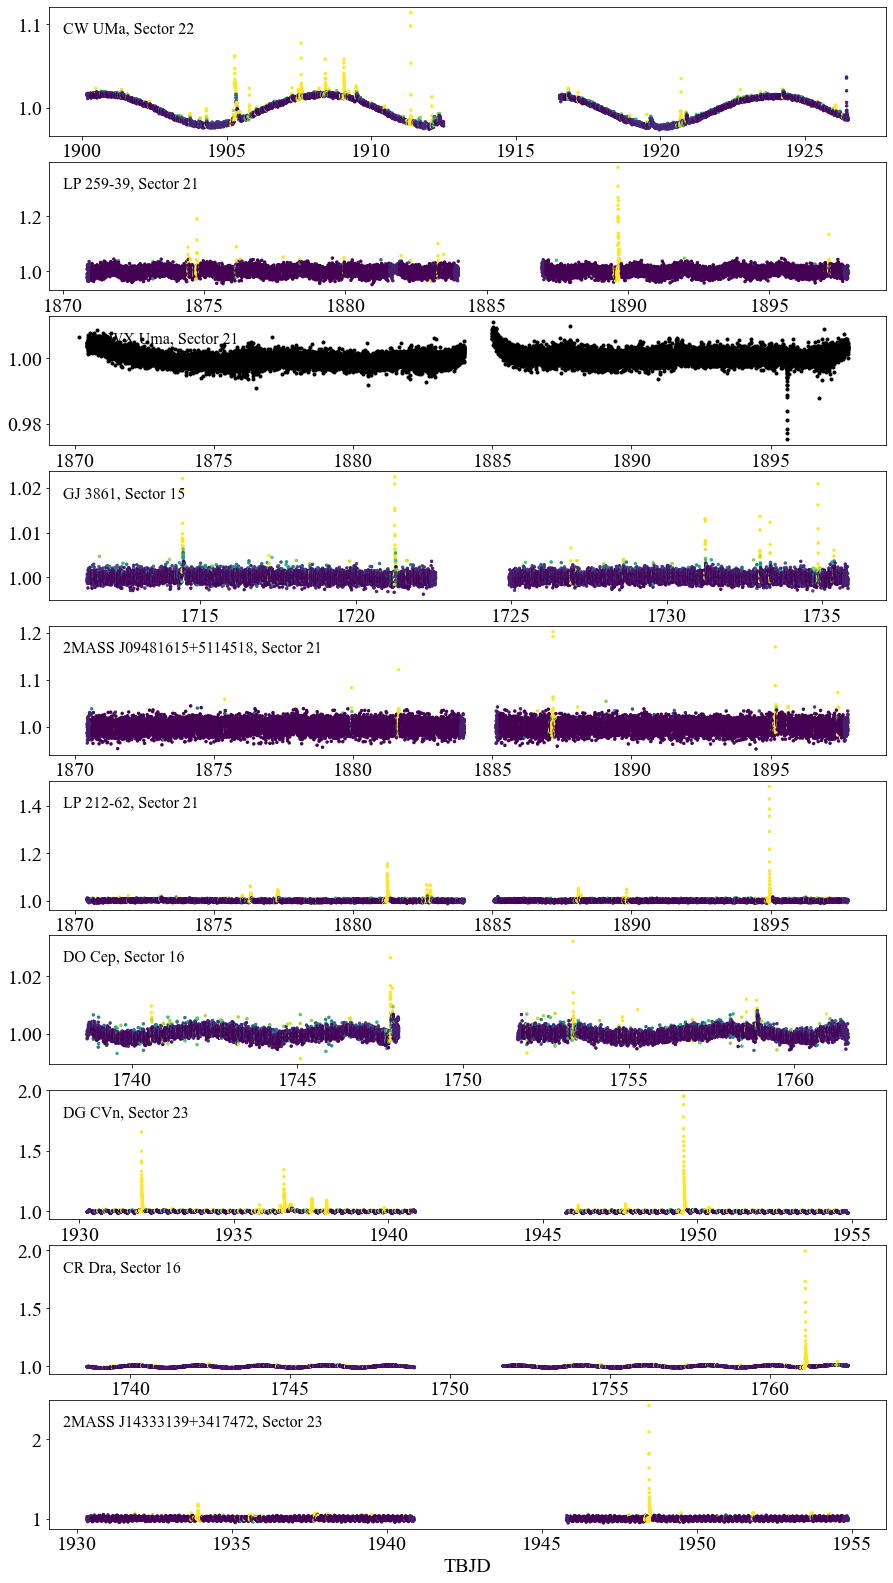

In [17]:
fig, axes = plt.subplots(10,1,figsize=(15,28))
plt.rcParams['font.size'] = 18

for j, lc in enumerate(all_lcs):
#     try:
    lcc = lc.remove_nans()
    ax = axes[j]
    ax.set_rasterized(True)
    ax.scatter(lcc.time.value,lcc.flux,c=all_preds[j],label='%s, Sector %d' % (active[j],lcc.sector),
               vmin=0, vmax=1, s=6)
    leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
    for item in leg.legendHandles:
        item.set_visible(False)

#         ax.set_ylim(0.93,1.1)
    if j == 9:
        ax.set_xlabel('TBJD')
#     except:
#         lcc = lc.remove_nans()
#         ax = axes[j]
#         ax.set_rasterized(True)
#         ax.plot(lcc.time.value,lcc.flux,'.k',label='%s, Sector %d' % (active[j],lcc.sector),markersize=6)
#         leg = ax.legend(frameon=False,loc=2,fontsize=16)
# #         ax.set_ylim(0.93,1.1)
#         if j == 9:
#             ax.set_xlabel('TBJD')

plt.savefig('active_stars_1_sector.png',bbox_inches='tight',rasterized=True)
plt.savefig('active_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)

## Now let's do the simultaneous ones

In [18]:
stars_simultaneous = {'GJ 450':'2020-03-16T20:11:00',
         '2MASS J09481615+5114518':'2020-01-31T20:45:40'}
simultaneous = stars_simultaneous.keys()

all_lcs = []
all_preds = []

for star in simultaneous:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?
    print(search)
    lcs = search[0].download_all().stitch().remove_nans().normalize()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('%savg_preds_%s_%d.csv' % (ddir,star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds)

Doing GJ 450


<ipython-input-18-eeb3cd14daaa>:11: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 22 2020   SPOC     120   144400022      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.8/site-packages/lightkurve-2.0.9-py3.8.egg/lightkurve/lightcurve.py:990: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(
<ipython-input-18-eeb3cd14daaa>:11: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = lk.search_lightcurvefile('TIC %d' % tic,exptime=120) # why is the TIC wrong?


Doing 2MASS J09481615+5114518
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 21 2020   SPOC     120   453430899      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.8/site-packages/lightkurve-2.0.9-py3.8.egg/lightkurve/lightcurve.py:990: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(


<ipython-input-19-0f7502e0fc78>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('simultaneous_obs.png',bbox_inches='tight',rasterized=True)
<ipython-input-19-0f7502e0fc78>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('simultaneous_obs.pdf',bbox_inches='tight',rasterized=True)


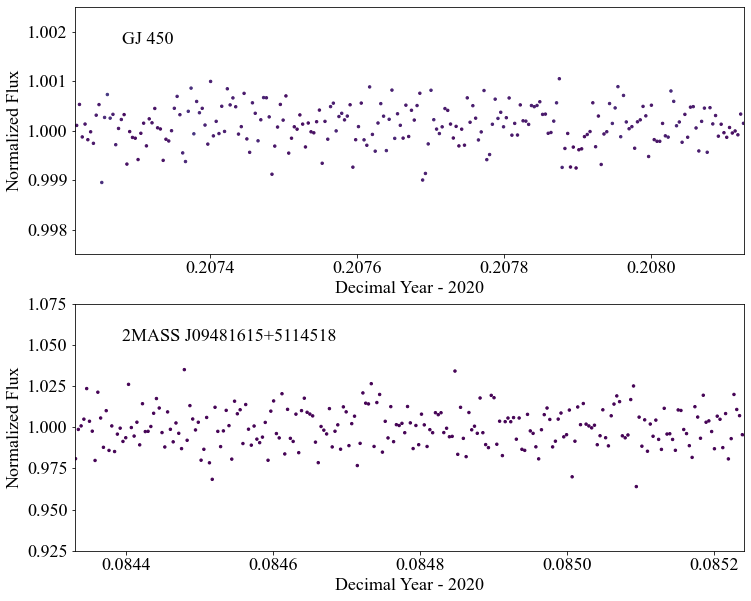

In [19]:
fig, axes = plt.subplots(2,1,figsize=(12.0,10.0))
from astropy.time import Time, TimeDelta

for j, star in enumerate(simultaneous):
    ax = axes[j]
    ax.set_rasterized(True)
    lc = all_lcs[j]
    tstart = stars_simultaneous[star]
    dates = lc.time
    t = Time(tstart, format='isot', scale='utc')
    dt = TimeDelta(3600.*8., format='sec')
    tfinish = t+dt
    
    ax.scatter(dates.decimalyear-2020,lc.flux,c=np.hstack(all_preds[j]),
                        vmin=0, vmax=1, s=6, label=star)
    ax.set_xlim(t.decimalyear-2020,tfinish.decimalyear-2020)
#     ax.axvline(t.decimalyear-2020)
#     ax.axvline(tfinish.decimalyear-2020)

    ax.set_xlabel('Decimal Year - 2020')
    ax.set_ylabel('Normalized Flux')
#     leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
    ax.annotate(star,xy=(0.07,0.85),xycoords='axes fraction' )
    # plt.ylim(0.98,1.01)
    # plt.xlim(t.decimalyear-2020-0.05,tfinish.decimalyear-2020+0.05)
#     a.colorbar()

axes[0].set_ylim(0.9975,1.0025)
axes[1].set_ylim(0.925,1.075)

plt.savefig('simultaneous_obs.png',bbox_inches='tight',rasterized=True)
plt.savefig('simultaneous_obs.pdf',bbox_inches='tight',rasterized=True)

## Now let's look at the overall flare-rate distribution using the Günther data.

In [37]:
gunther = Table.read('../data/combined_catalog_per_star.csv')
gunther.rename_column('TIC_ID','TIC')

In [38]:
join(gunther,data,keys='TIC')

TIC,OBS_Sector,TICv8_ra,TICv8_dec,TICv8_Teff,TICv8_Tmag,TICv8_d,BANYAN_BEST_HYP,N_flares,N_flares_per_day,flare_amp_max,flare_amp_median,flare_dur_max,flare_dur_median,flare_prob_max,flare_prob_median,Name,LOFAR Lum (x1E14 ergs/s/Hz),Soft X-ray Lum (x1E28 ergs/s),Uncert. Lofar Lum,Literature Rotation Period,Rotation Period,Flare Rate,N Sectors
int64,str29,float64,float64,float64,float64,float64,str6,int64,float64,float64,float64,float64,float64,float64,float64,str23,float64,str5,float64,str5,float64,float64,int64
11893637,22,177.740506,48.377378,3114.0,10.297,8.036,FIELD,3,0.10909090909090909,0.005119,0.003102,0.054869,0.054868,0.74,0.61,GJ 1151,0.63,0.02,0.15,125,3.865651,0.529347,3
144400022,22,177.780569,35.272014,3640.0,7.787,8.759,FIELD,5,0.18181818181818182,0.068383,0.00441,0.05499,0.054875,1.0,0.99,GJ 450,0.54,0.66,0.2,23,3.734007,0.645082,3
148673115,21;22,169.877562,46.6953,2867.0,12.109,--,FIELD,4,0.07272727272727272,0.013722,0.011566,0.062538,0.055226,0.73,0.55,LP 169-22,1.03,<0.03,0.48,--,3.959005,0.308293,6
207492082,16;23,246.352597,54.304102,3549.0,8.025,6.472,FIELD,1,0.01818181818181818,0.019419,0.019419,0.054905,0.054905,1.0,1.0,GJ 625,0.8,0.04,0.09,79.8,7.512016,0.032156,11


In [32]:
data['TIC']

85334035
166597074
307957392
11893637
252803603
144400022
298164374
453430899
392365135
414587194
207492082
